<a href="https://colab.research.google.com/github/Valeeew/Market-analysis-f0r-a-food-company/blob/main/Analytics_P9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard pack
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# Pack for dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import ward, fcluster, leaders
# Pack for K-means
from sklearn import metrics
import sklearn.cluster
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DATA/P9/joined_data_p9.csv", delimiter=";")
df

,Zone,Prix export $/tonnes,Population,Production (Milliers de tonnes),Nourriture (Milliers de tonnes),Disponibilité de matière grasse en quantité,Autres utilisations (non alimentaire) (Milliers de tonnes),Importations - Quantité (Milliers de tonnes),Résidus (Milliers de tonnes),Aliments pour animaux (Milliers de tonnes),...,Semences (Milliers de tonnes),Disponibilité alimentaire en quantité (kg/personne/an),Pertes (Milliers de tonnes),Disponibilité intérieure (Milliers de tonnes),Exportations - Quantité (Milliers de tonnes),Variation de stock (Milliers de tonnes),Traitement (Milliers de tonnes),Disponibilité de protéines en quantité,Disponibilité alimentaire (Kcal/personne/jour),Production USD$/tonne
0,Afghanistan,1024.590164,36296113,28.0,55.0,0.33,NaN,29.0,0.0,NaN,...,NaN,1.53,2.0,57.0,NaN,0.0,NaN,0.54,5.0,NaN
1,Afrique du Sud,NaN,57009756,1667.0,2035.0,9.25,NaN,514.0,0.0,NaN,...,NaN,35.69,83.0,2118.0,63.0,0.0,NaN,14.11,143.0,2015.1
2,Albanie,1333.333333,2884169,13.0,47.0,6.45,NaN,38.0,0.0,NaN,...,NaN,16.36,NaN,47.0,0.0,4.0,NaN,6.26,85.0,NaN
3,Algérie,NaN,41389189,275.0,264.0,1.50,NaN,2.0,0.0,NaN,...,NaN,6.38,13.0,277.0,0.0,0.0,NaN,1.97,22.0,2180.7
4,Allemagne,3359.989429,82658409,1514.0,1609.0,4.16,NaN,842.0,-38.0,NaN,...,NaN,19.47,NaN,1739.0,646.0,-29.0,167.0,7.96,71.0,1459.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),NaN,29402484,600.0,596.0,4.39,NaN,25.0,0.0,NaN,...,NaN,20.28,30.0,626.0,0.0,-1.0,NaN,7.23,71.0,NaN
168,Viet Nam,854.409318,94600648,918.0,1166.0,3.40,NaN,291.0,0.0,NaN,...,NaN,12.33,39.0,1206.0,1.0,2.0,NaN,4.01,48.0,3852.8
169,Yémen,1409.023512,27834819,168.0,237.0,1.85,NaN,78.0,NaN,NaN,...,NaN,8.53,8.0,246.0,0.0,0.0,NaN,3.04,30.0,5091.4
170,Zambie,NaN,16853599,49.0,58.0,0.72,NaN,12.0,0.0,NaN,...,NaN,3.42,2.0,60.0,1.0,0.0,NaN,1.15,11.0,NaN


In [3]:
#sns.pairplot(df, height=8)

Ci dessus, on peut distinguer 6 corrélation entre ces 3 variables:
* la disponibilité alimentaire en quantité 
* La disponibilité de matière grasse en quantité
* la disponibilité de protéïne en quantité 

In [4]:
for idx,column in enumerate(df.columns):
  print(idx,column) 

0 Zone
1 Prix export $/tonnes
2 Population
3 Production (Milliers de tonnes)
4 Nourriture (Milliers de tonnes)
5 Disponibilité de matière grasse en quantité 
6 Autres utilisations (non alimentaire) (Milliers de tonnes)
7 Importations - Quantité (Milliers de tonnes)
8 Résidus (Milliers de tonnes)
9 Aliments pour animaux (Milliers de tonnes)
10 Alimentation pour touristes (Milliers de tonnes)
11 Semences (Milliers de tonnes)
12 Disponibilité alimentaire en quantité (kg/personne/an) 
13 Pertes (Milliers de tonnes)
14 Disponibilité intérieure (Milliers de tonnes)
15 Exportations - Quantité (Milliers de tonnes)
16 Variation de stock (Milliers de tonnes)
17 Traitement (Milliers de tonnes)
18 Disponibilité de protéines en quantité
19 Disponibilité alimentaire (Kcal/personne/jour)
20 Production USD$/tonne


In [5]:
df = df.replace(np.nan,0)

In [6]:
df_dispo = df.iloc[:,[0,2,19,12,7,15]]
df_dispo

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Importations - Quantité (Milliers de tonnes),Exportations - Quantité (Milliers de tonnes)
0,Afghanistan,36296113,5.0,1.53,29.0,0.0
1,Afrique du Sud,57009756,143.0,35.69,514.0,63.0
2,Albanie,2884169,85.0,16.36,38.0,0.0
3,Algérie,41389189,22.0,6.38,2.0,0.0
4,Allemagne,82658409,71.0,19.47,842.0,646.0
...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),29402484,71.0,20.28,25.0,0.0
168,Viet Nam,94600648,48.0,12.33,291.0,1.0
169,Yémen,27834819,30.0,8.53,78.0,0.0
170,Zambie,16853599,11.0,3.42,12.0,1.0


In [7]:
df_dispo.set_index("Zone",inplace = True)

In [8]:
x = df_dispo.values

In [9]:
y = df_dispo.index
y

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe'],
      dtype='object', name='Zone', length=172)

Normalisation centré réduite x

In [10]:
stdscl = StandardScaler().fit(x)
x__scaled = stdscl.transform(x)

In [11]:
z = linkage(x__scaled, method="ward", metric="euclidean")

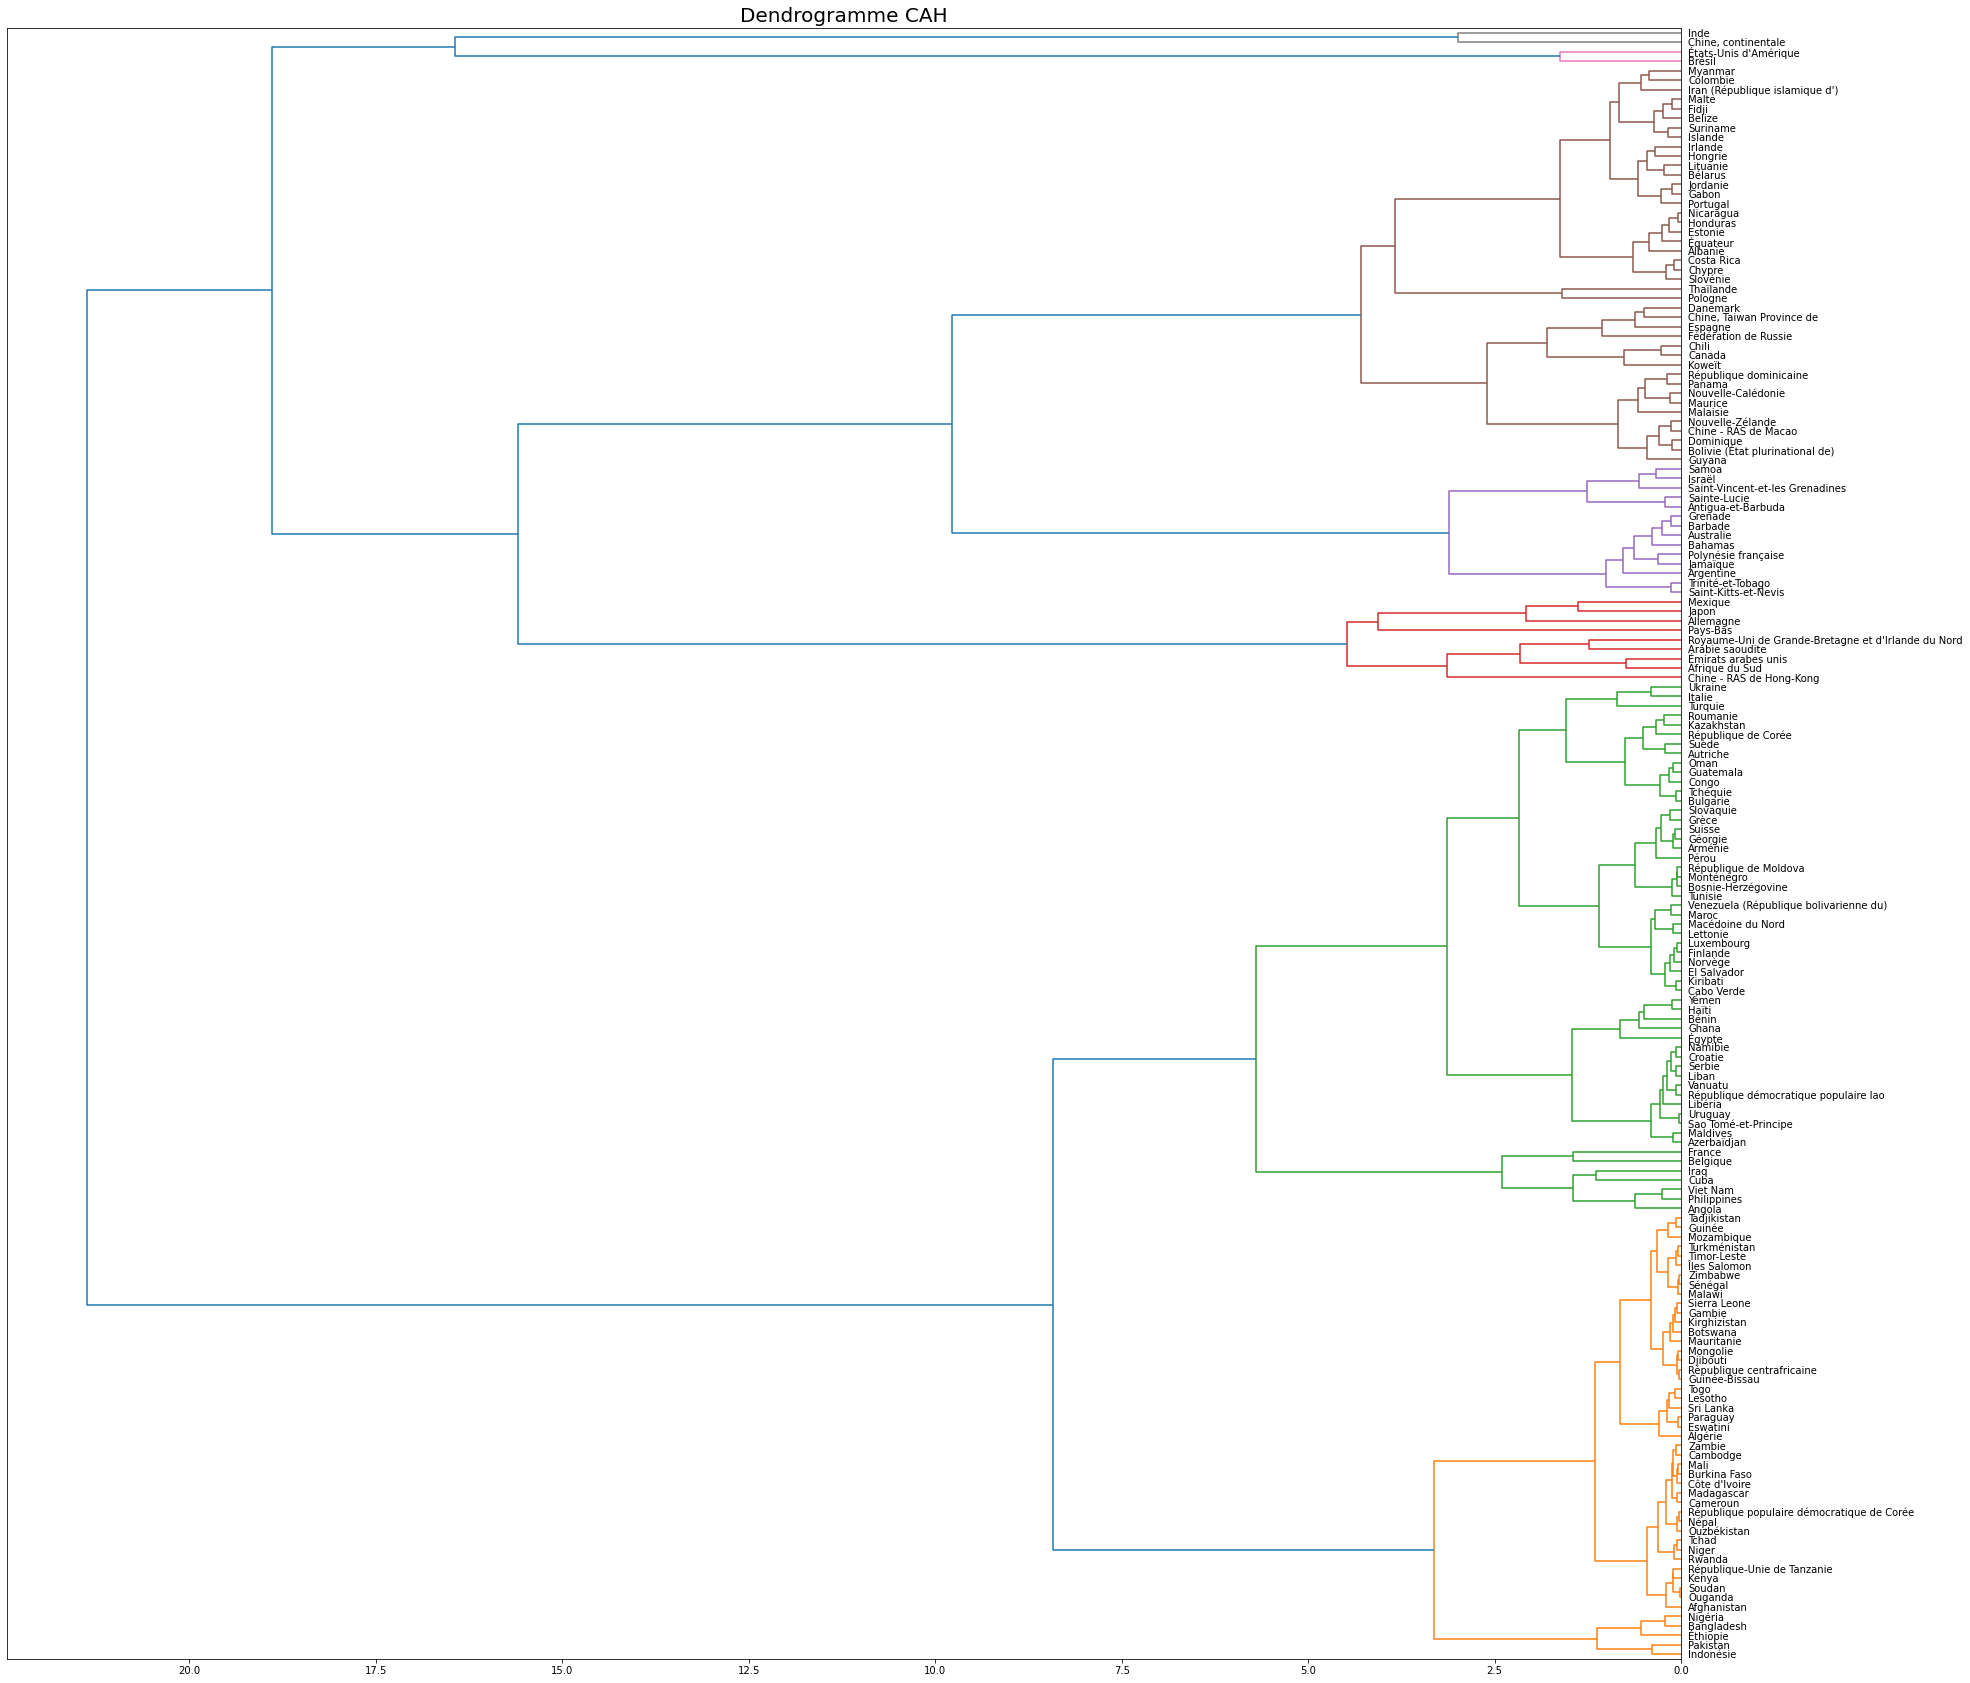

In [12]:
fig = plt.figure(figsize=(30,30))
plt.title("Dendrogramme CAH", fontsize=20)
dendrogram(z, labels = y, leaf_font_size=10, color_threshold=7, orientation="left")
plt.show()

In [13]:
groupes_cah = fcluster(z, 7, criterion='maxclust')

In [14]:
df["CAH"] = groupes_cah 

In [15]:
df

,Zone,Prix export $/tonnes,Population,Production (Milliers de tonnes),Nourriture (Milliers de tonnes),Disponibilité de matière grasse en quantité,Autres utilisations (non alimentaire) (Milliers de tonnes),Importations - Quantité (Milliers de tonnes),Résidus (Milliers de tonnes),Aliments pour animaux (Milliers de tonnes),...,Disponibilité alimentaire en quantité (kg/personne/an),Pertes (Milliers de tonnes),Disponibilité intérieure (Milliers de tonnes),Exportations - Quantité (Milliers de tonnes),Variation de stock (Milliers de tonnes),Traitement (Milliers de tonnes),Disponibilité de protéines en quantité,Disponibilité alimentaire (Kcal/personne/jour),Production USD$/tonne,CAH
0,Afghanistan,1024.590164,36296113,28.0,55.0,0.33,0.0,29.0,0.0,0.0,...,1.53,2.0,57.0,0.0,0.0,0.0,0.54,5.0,0.0,1
1,Afrique du Sud,0.000000,57009756,1667.0,2035.0,9.25,0.0,514.0,0.0,0.0,...,35.69,83.0,2118.0,63.0,0.0,0.0,14.11,143.0,2015.1,3
2,Albanie,1333.333333,2884169,13.0,47.0,6.45,0.0,38.0,0.0,0.0,...,16.36,0.0,47.0,0.0,4.0,0.0,6.26,85.0,0.0,5
3,Algérie,0.000000,41389189,275.0,264.0,1.50,0.0,2.0,0.0,0.0,...,6.38,13.0,277.0,0.0,0.0,0.0,1.97,22.0,2180.7,1
4,Allemagne,3359.989429,82658409,1514.0,1609.0,4.16,0.0,842.0,-38.0,0.0,...,19.47,0.0,1739.0,646.0,-29.0,167.0,7.96,71.0,1459.6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),0.000000,29402484,600.0,596.0,4.39,0.0,25.0,0.0,0.0,...,20.28,30.0,626.0,0.0,-1.0,0.0,7.23,71.0,0.0,2
168,Viet Nam,854.409318,94600648,918.0,1166.0,3.40,0.0,291.0,0.0,0.0,...,12.33,39.0,1206.0,1.0,2.0,0.0,4.01,48.0,3852.8,2
169,Yémen,1409.023512,27834819,168.0,237.0,1.85,0.0,78.0,0.0,0.0,...,8.53,8.0,246.0,0.0,0.0,0.0,3.04,30.0,5091.4,2
170,Zambie,0.000000,16853599,49.0,58.0,0.72,0.0,12.0,0.0,0.0,...,3.42,2.0,60.0,1.0,0.0,0.0,1.15,11.0,0.0,1


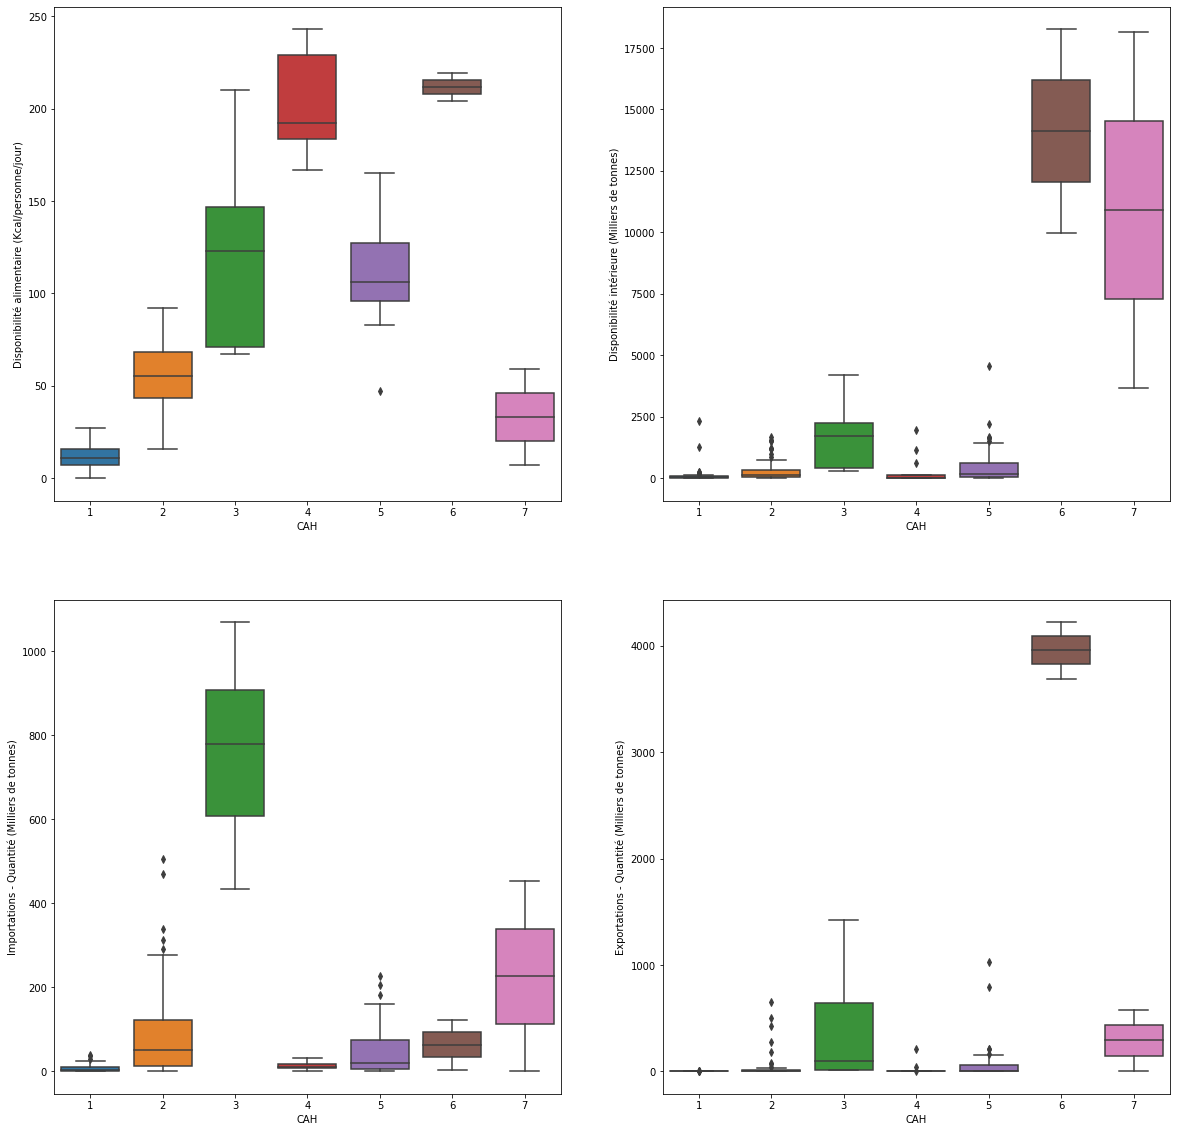

In [16]:
plt.figure(figsize=(20,20))

plt.subplot(221)
sns.boxplot(data=df, x=df.CAH, y=df["Disponibilité alimentaire (Kcal/personne/jour)"])

plt.subplot(222)
sns.boxplot(data=df, x=df.CAH, y=df["Disponibilité intérieure (Milliers de tonnes)"])

plt.subplot(223)
sns.boxplot(data=df, x=df.CAH, y=df["Importations - Quantité (Milliers de tonnes)"])

plt.subplot(224)
sns.boxplot(data=df, x=df.CAH, y=df["Exportations - Quantité (Milliers de tonnes)"])

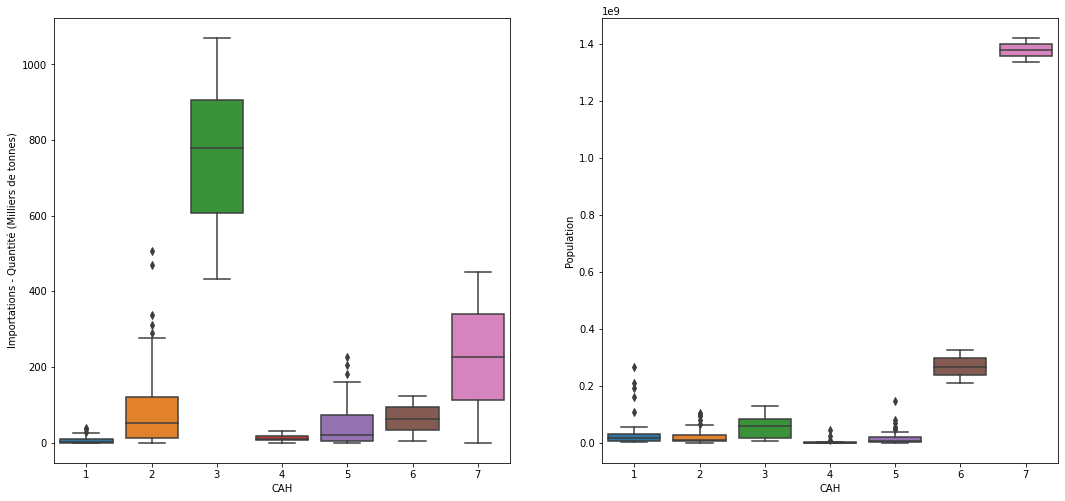

In [17]:
plt.figure(figsize=(18,18))

plt.subplot(221)
sns.boxplot(data=df, x=df.CAH, y=df["Importations - Quantité (Milliers de tonnes)"])

plt.subplot(222)
sns.boxplot(data=df, x=df.CAH, y=df["Population"])

In [18]:
#df_dispo.set_index("Zone", inplace=True)
acp = PCA(n_components=5).fit_transform(df_dispo)

In [19]:
pca = PCA(svd_solver="full")
pca.fit(x__scaled)
print(pca.explained_variance_ratio_.cumsum())

[0.43485701 0.68855115 0.85911601 0.99776232 1.        ]


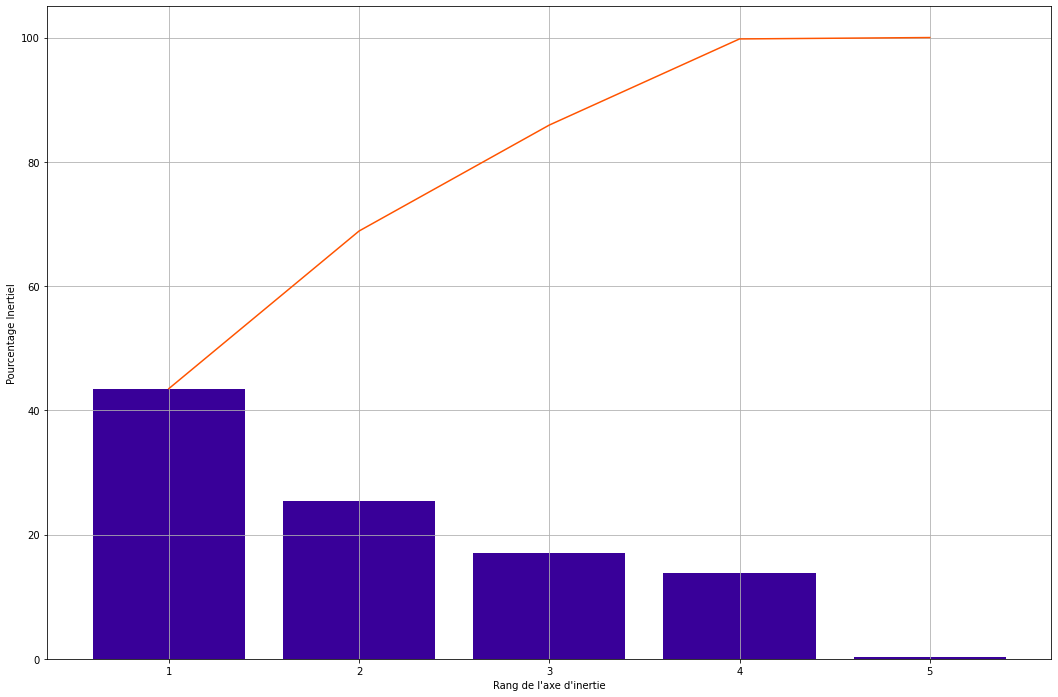

In [20]:
pca_viz = PCA()
pca_viz.fit(x__scaled)
ratio_var = pca_viz.explained_variance_ratio_*100

plt.figure(figsize=(18,12))
plt.bar(np.arange(len(ratio_var))+1,ratio_var, color ="#390099")
plt.plot(np.arange(len(ratio_var))+1,ratio_var.cumsum(),c="#FF5400")
plt.grid()
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage Inertiel")
plt.show()

<function matplotlib.pyplot.show>

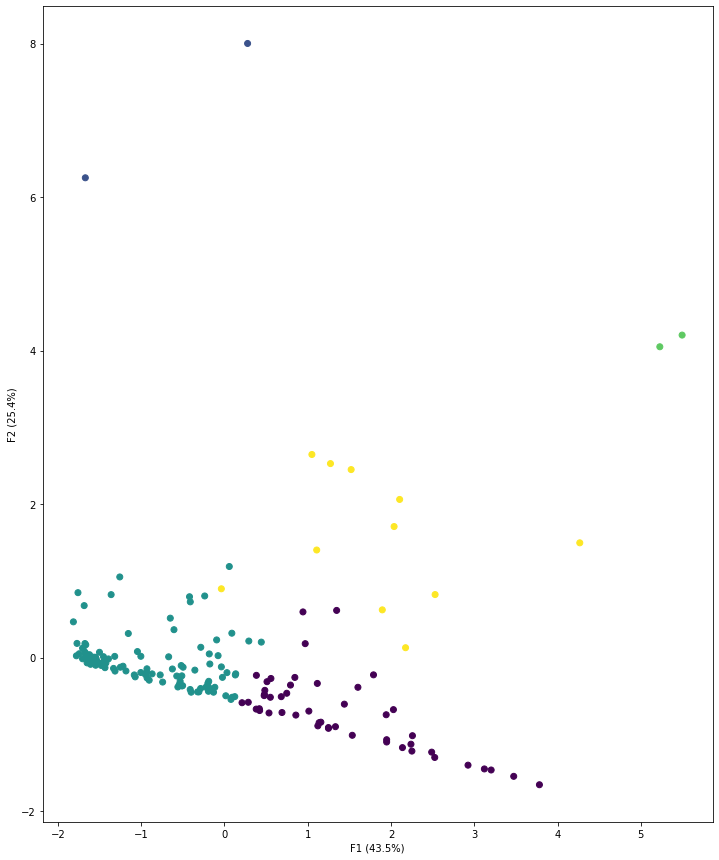

In [21]:
from scipy import cluster
clust = KMeans(n_clusters=5)
clust.fit(x__scaled)
clusters_kmeans2 = clust.labels_

x_projection = pca.transform(x__scaled)

plt.figure(figsize=(12,15))
plt.scatter(x_projection[:,0],x_projection[:,1],c=clusters_kmeans2)
plt.xlabel("F{} ({}%)".format(1, round(100*pca_viz.explained_variance_ratio_[0],1)))
plt.ylabel("F{} ({}%)".format(2, round(100*pca_viz.explained_variance_ratio_[1],1)))
plt.show

In [22]:
centroids = clust.cluster_centers_
pd.DataFrame(centroids, columns=df_dispo.columns)

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Importations - Quantité (Milliers de tonnes),Exportations - Quantité (Milliers de tonnes)
0,-0.186199,1.126480,1.131685,-0.236254,-0.104681
1,8.760478,-0.688106,-0.818152,0.742168,0.407788
2,-0.114394,-0.605625,-0.602271,-0.246256,-0.169663
3,1.465210,2.267439,2.000844,-0.137564,8.437650
4,0.093357,0.641024,0.657024,3.360267,0.523829


In [23]:
idk = np.argsort(clust.labels_)

dfclust = pd.DataFrame(df.index[idk], clust.labels_[idk]).reset_index()
dfclust = dfclust.rename(columns={"index":"k_means"})

df = pd.merge(df, dfclust, left_index=True, right_index=True)
df

,Zone,Prix export $/tonnes,Population,Production (Milliers de tonnes),Nourriture (Milliers de tonnes),Disponibilité de matière grasse en quantité,Autres utilisations (non alimentaire) (Milliers de tonnes),Importations - Quantité (Milliers de tonnes),Résidus (Milliers de tonnes),Aliments pour animaux (Milliers de tonnes),...,Disponibilité intérieure (Milliers de tonnes),Exportations - Quantité (Milliers de tonnes),Variation de stock (Milliers de tonnes),Traitement (Milliers de tonnes),Disponibilité de protéines en quantité,Disponibilité alimentaire (Kcal/personne/jour),Production USD$/tonne,CAH,k_means,0
0,Afghanistan,1024.590164,36296113,28.0,55.0,0.33,0.0,29.0,0.0,0.0,...,57.0,0.0,0.0,0.0,0.54,5.0,0.0,1,0,139
1,Afrique du Sud,0.000000,57009756,1667.0,2035.0,9.25,0.0,514.0,0.0,0.0,...,2118.0,63.0,0.0,0.0,14.11,143.0,2015.1,3,0,38
2,Albanie,1333.333333,2884169,13.0,47.0,6.45,0.0,38.0,0.0,0.0,...,47.0,0.0,4.0,0.0,6.26,85.0,0.0,5,0,42
3,Algérie,0.000000,41389189,275.0,264.0,1.50,0.0,2.0,0.0,0.0,...,277.0,0.0,0.0,0.0,1.97,22.0,2180.7,1,0,44
4,Allemagne,3359.989429,82658409,1514.0,1609.0,4.16,0.0,842.0,-38.0,0.0,...,1739.0,646.0,-29.0,167.0,7.96,71.0,1459.6,3,0,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),0.000000,29402484,600.0,596.0,4.39,0.0,25.0,0.0,0.0,...,626.0,0.0,-1.0,0.0,7.23,71.0,0.0,2,4,123
168,Viet Nam,854.409318,94600648,918.0,1166.0,3.40,0.0,291.0,0.0,0.0,...,1206.0,1.0,2.0,0.0,4.01,48.0,3852.8,2,4,57
169,Yémen,1409.023512,27834819,168.0,237.0,1.85,0.0,78.0,0.0,0.0,...,246.0,0.0,0.0,0.0,3.04,30.0,5091.4,2,4,81
170,Zambie,0.000000,16853599,49.0,58.0,0.72,0.0,12.0,0.0,0.0,...,60.0,1.0,0.0,0.0,1.15,11.0,0.0,1,4,7
